In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("/content/coffee_shop_revenue.csv")

In [3]:
df.head(3)

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue
0,152,6.74,14,4,106.62,97,1547.81
1,485,4.50,12,8,57.83,744,2084.68
2,398,9.09,6,6,91.76,636,3118.39


In [4]:
df.isnull().sum()

,0
Number_of_Customers_Per_Day,0
Average_Order_Value,0
Operating_Hours_Per_Day,0
Number_of_Employees,0
Marketing_Spend_Per_Day,0
Location_Foot_Traffic,0
Daily_Revenue,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Number_of_Customers_Per_Day  2000 non-null   int64  
 1   Average_Order_Value          2000 non-null   float64
 2   Operating_Hours_Per_Day      2000 non-null   int64  
 3   Number_of_Employees          2000 non-null   int64  
 4   Marketing_Spend_Per_Day      2000 non-null   float64
 5   Location_Foot_Traffic        2000 non-null   int64  
 6   Daily_Revenue                2000 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 109.5 KB


In [6]:
df.describe()

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,274.296000,6.261215,11.667000,7.947000,252.614160,534.893500,1917.325940
std,129.441933,2.175832,3.438608,3.742218,141.136004,271.662295,976.202746
min,50.000000,2.500000,6.000000,2.000000,10.120000,50.000000,-58.950000
25%,164.000000,4.410000,9.000000,5.000000,130.125000,302.000000,1140.085000
50%,275.000000,6.300000,12.000000,8.000000,250.995000,540.000000,1770.775000
75%,386.000000,8.120000,15.000000,11.000000,375.352500,767.000000,2530.455000
max,499.000000,10.000000,17.000000,14.000000,499.740000,999.000000,5114.600000


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [9]:
total_revenue = df['Daily_Revenue'].sum()
total_revenue

3834651.88

In [10]:
print(df.corr()['Daily_Revenue'].sort_values(ascending=False))

Daily_Revenue                  1.000000
Number_of_Customers_Per_Day    0.736461
Average_Order_Value            0.535694
Marketing_Spend_Per_Day        0.254812
Location_Foot_Traffic          0.013469
Number_of_Employees            0.003295
Operating_Hours_Per_Day       -0.005323
Name: Daily_Revenue, dtype: float64


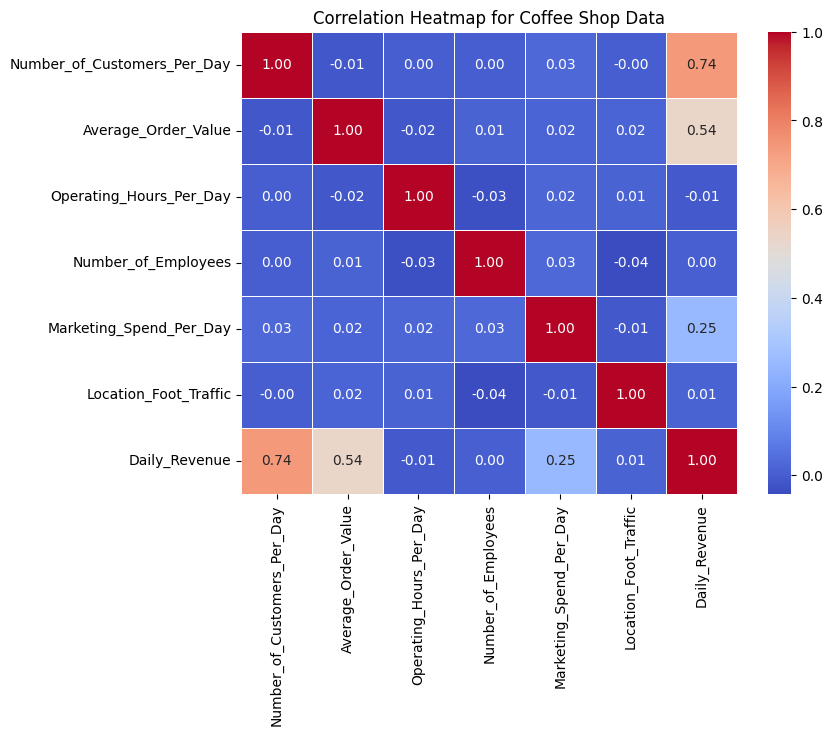

In [11]:
correlation_matrix = df.corr()

plt.figure(figsize=(8, 6))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation Heatmap for Coffee Shop Data')
plt.show()


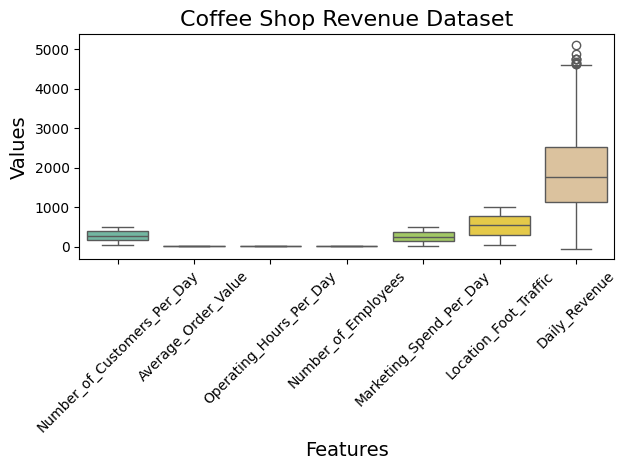

In [12]:
# Create a box plot
sns.boxplot(data=df, palette="Set2")
plt.title('Coffee Shop Revenue Dataset', fontsize=16)
plt.xticks(rotation=45)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.tight_layout()
plt.show()

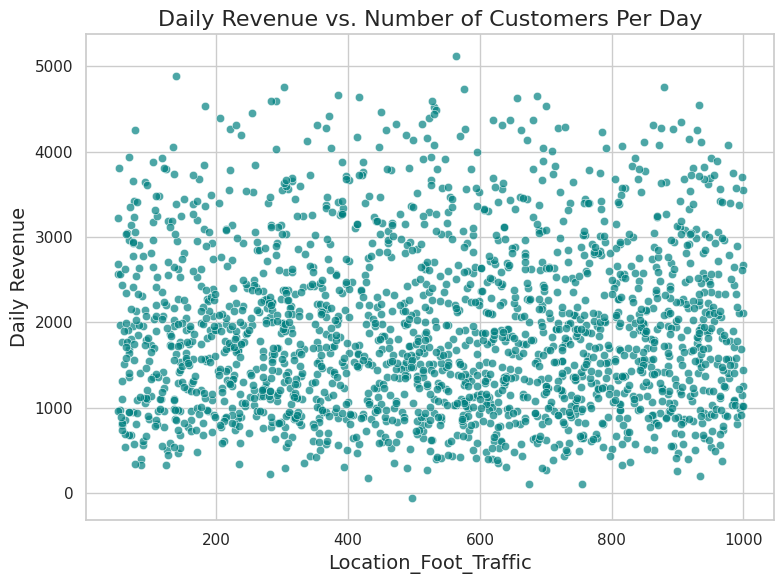

In [13]:
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.scatterplot(x='Location_Foot_Traffic', y='Daily_Revenue', data=df, color='teal', alpha=0.7)
plt.title('Daily Revenue vs. Number of Customers Per Day', fontsize=16)
plt.xlabel('Location_Foot_Traffic', fontsize=14)
plt.ylabel('Daily Revenue', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

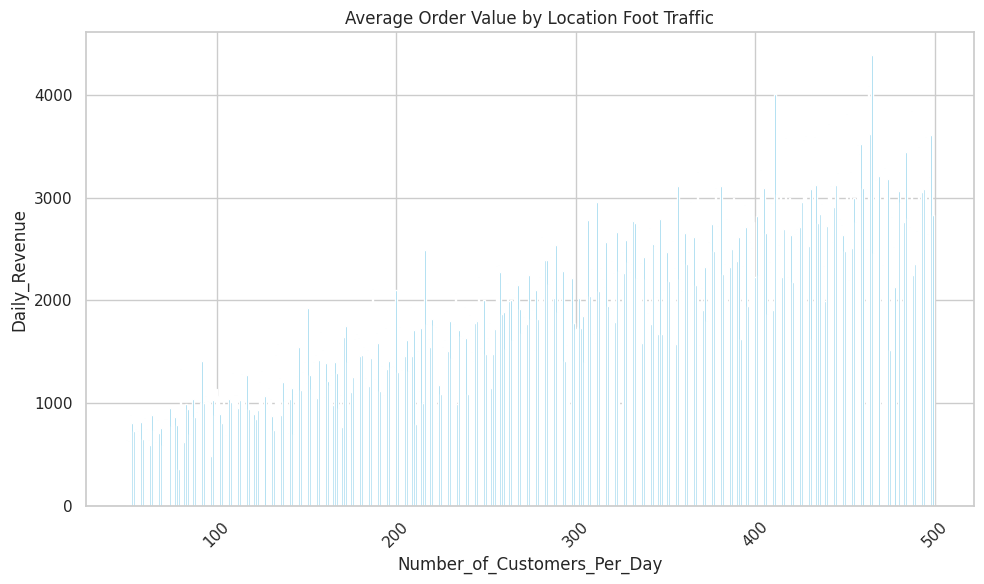

In [14]:
avg_order_value = df.groupby('Number_of_Customers_Per_Day')['Daily_Revenue'].mean().reset_index()

# Plotting the bar chart with average values
plt.figure(figsize=(10, 6))
plt.bar(avg_order_value['Number_of_Customers_Per_Day'], avg_order_value['Daily_Revenue'], color='skyblue')

# Adding labels and title
plt.xlabel('Number_of_Customers_Per_Day')
plt.ylabel('Daily_Revenue')
plt.title('Average Order Value by Location Foot Traffic')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [15]:
x = df.drop(columns='Daily_Revenue')
y=df['Daily_Revenue']

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lr = LinearRegression()

In [20]:
lr.fit(x_train , y_train)

LinearRegression()

In [21]:
y_pred = lr.predict(x_test)

In [22]:
from sklearn.metrics import r2_score

In [23]:
r2_score(y_test, y_pred)

0.895576840810998

In [24]:
param_space = {'copy_X': [True,False],
               'fit_intercept': [True,False],
               'n_jobs': [1,5,10,15,None],
               'positive': [True,False]}


In [28]:
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(lr, param_space, n_iter=100, cv=5)
random_search.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 40 is smaller than n_iter=100. Running 40 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=LinearRegression(), n_iter=100,
                   param_distributions={'copy_X': [True, False],
                                        'fit_intercept': [True, False],
                                        'n_jobs': [1, 5, 10, 15, None],
                                        'positive': [True, False]})

In [29]:
print(f"Best Score: {random_search.best_score_}")

Best Score: 0.8893470428375425
